# Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.spatial import distance_matrix
from scipy.cluster import hierarchy
import seaborn as sns

# Testando agrupamento hierárquico
Inicialmente, vamos carregar um conjunto de dados (sintético) para testar a execução de três algoritmos de agrupamento hierárquico: single-link, complete-link, average-link

In [2]:
df = pd.read_csv('data\segmentation data.csv')
df.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


In [3]:
df = df.drop(['ID'], axis = 1)
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


# Usando PCA

Agora vem a parte crítica: as próximas linhas de código projetarão os dados em componentes principais bidimensionais.

Utilizaremos a biblioteca sklearn para importar o módulo PCA e, no método PCA, passará o número de componentes (n_components=2) e finalmente chamará fit_transform nos dados agregados. Aqui, vários componentes representam a dimensão inferior na qual projetaremos nossos dados de dimensão superior.

In [4]:
from sklearn.decomposition import PCA
pca_df = PCA(n_components=2)
principalComponents_df = pca_df.fit_transform(df)

A seguir, vamos criar um DataFrame que terá os valores dos componentes principais para todas as amostras.

In [5]:
principal_df = pd.DataFrame(data = principalComponents_df
             , columns = ['x', 'y'])

In [6]:
principal_df

,x,y
0,3715.584256,30.714783
1,29818.579389,-17.036943
2,-31744.417466,16.420804
3,50610.581674,3.789668
4,28076.582639,14.143742
...,...,...
1995,2570.582129,10.823820
1996,-3210.419923,-8.574641
1997,-34554.419339,-1.306651
1998,-22986.420137,-9.494583


In [7]:
print('Variação explicada por componente principal: {}'.format(pca_df.explained_variance_ratio_))

Variação explicada por componente principal: [9.99999915e-01 8.37079548e-08]


A partir do resultado acima, você pode observar que o componente principal 1 contém 35% das informações, enquanto o componente principal 2 apenas 26% das informações. Além disso, o outro ponto a ser observado é que ao projetar dados tridimensionais em dados bidimensionais, 39% das informações foram perdidas.

# Divisão

Vamos visualizar o nosso conjunto de dados

<Axes: xlabel='Age', ylabel='Income'>

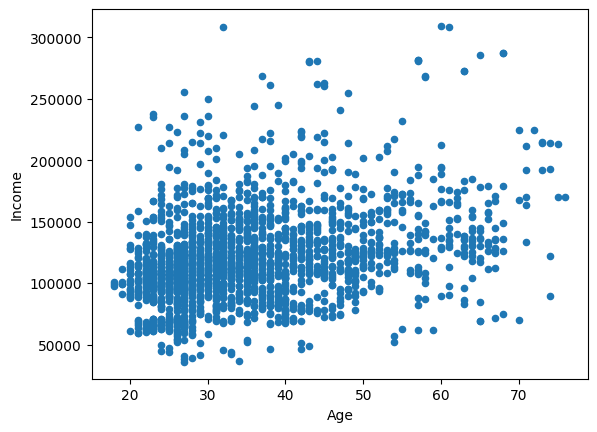

In [8]:
df.plot(kind='scatter',x='Age',y='Income')

<Axes: xlabel='x', ylabel='y'>

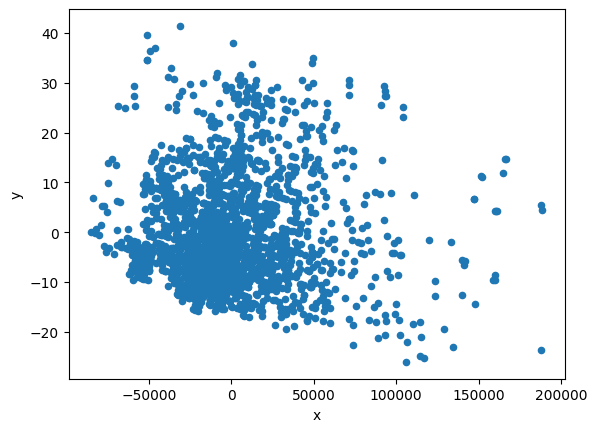

In [9]:
principal_df.plot(kind='scatter',x='x',y='y')

Agora, vamos calcular uma matriz de dissimilaridades usando a distância euclidiana.


In [10]:
def calcular_matriz_dissimilaridade(dados):
  M = np.zeros((len(dados),len(dados)))
  for i,row_i in dados.iterrows(): # para cada objeto i
      features_i = np.array(row_i) # atributos do objeto i
      for j,row_j in dados.iterrows(): # para cada objeto j
          features_j = np.array(row_j) # atributos do objeto j
          # calcula distância euclidiana
          euc = scipy.spatial.distance.euclidean(features_i, features_j)
          # armazena na posição M[i,j]
          M[i,j] = euc
  return M

In [11]:
M = calcular_matriz_dissimilaridade(df)

In [12]:
Mpca = calcular_matriz_dissimilaridade(principal_df)

# Agrupamento com Single-Link

C:\Users\gabya\AppData\Local\Temp\ipykernel_61572\735032587.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(M, 'single')


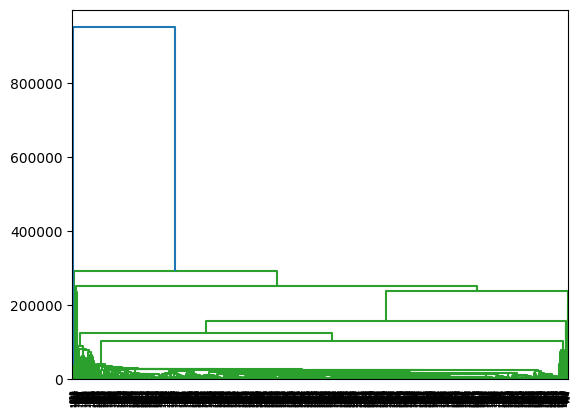

In [38]:
Z = hierarchy.linkage(M, 'single')
dendrogram = hierarchy.dendrogram(Z)

C:\Users\gabya\AppData\Local\Temp\ipykernel_61572\1384943836.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Zpca = hierarchy.linkage(Mpca, 'single')


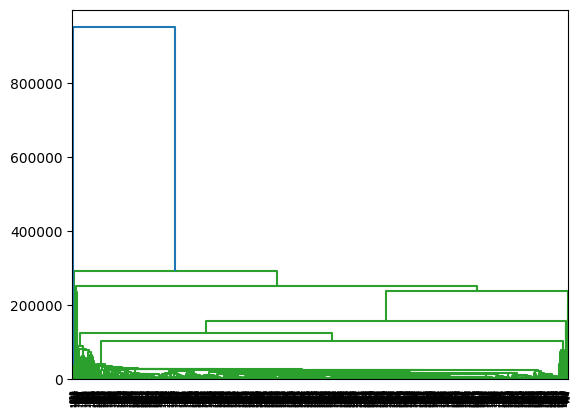

In [39]:
Zpca = hierarchy.linkage(Mpca, 'single')
dendrogram = hierarchy.dendrogram(Zpca)

In [40]:
df['cluster'] = hierarchy.cut_tree(Z,n_clusters=4)
df.sample(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
180,0,1,28,1,177291,1,2,0
151,0,0,38,1,108784,1,2,0
1933,0,0,38,1,96681,0,0,0
4,0,0,53,1,149031,1,1,0
336,1,1,23,1,84611,0,0,0
1472,1,1,43,2,101680,1,0,0
242,0,0,24,0,123353,1,1,0
1770,1,1,32,1,123707,1,0,0
725,1,1,41,2,112700,0,0,0
537,1,1,37,1,140285,1,1,0


In [41]:
principal_df['cluster'] = hierarchy.cut_tree(Zpca,n_clusters=4)
principal_df.sample(10)

,x,y,cluster
1644,-39076.419628,-3.831265,0
539,-692.418059,9.191001,0
744,129095.579670,-19.458735,0
1424,-4266.420011,-9.467175,0
1336,473.580580,-3.963585,0
1509,32925.581868,6.663015,0
214,11812.582510,13.851581,0
972,-79274.419297,1.395396,0
785,5099.580861,-1.427605,0
135,-11643.418702,3.293664,0


<Axes: xlabel='Age', ylabel='Income'>

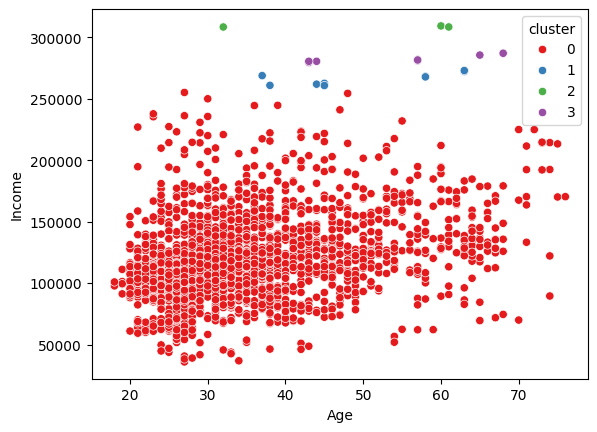

In [42]:
sns.scatterplot(data=df, x="Age", y="Income", hue="cluster", palette='Set1')

<Axes: xlabel='x', ylabel='y'>

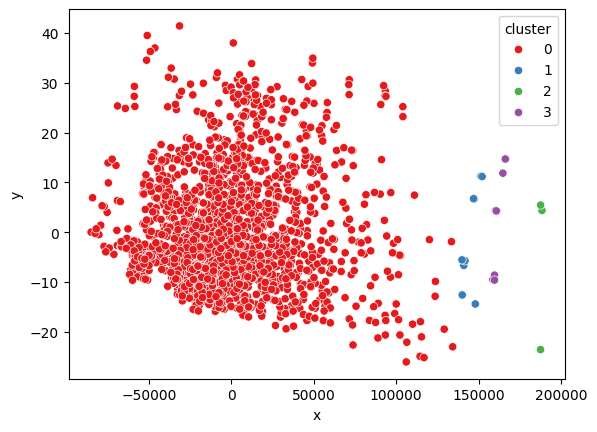

In [43]:
sns.scatterplot(data=principal_df, x="x", y="y", hue="cluster", palette='Set1')

## Agrupamento com Complete-Link

C:\Users\gabya\AppData\Local\Temp\ipykernel_61572\2583415576.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(M, 'complete')


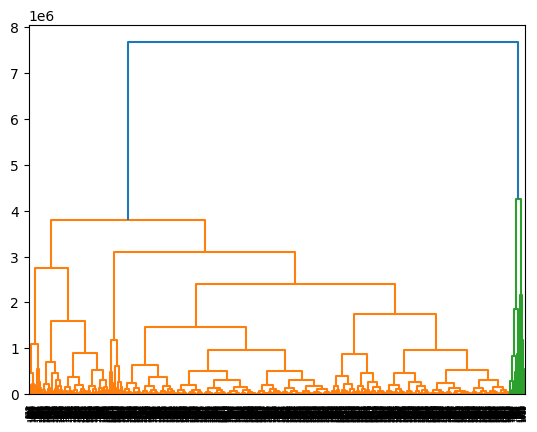

In [44]:
Z = hierarchy.linkage(M, 'complete')
dendrogram = hierarchy.dendrogram(Z)

C:\Users\gabya\AppData\Local\Temp\ipykernel_61572\3457296873.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Zpca = hierarchy.linkage(Mpca, 'complete')


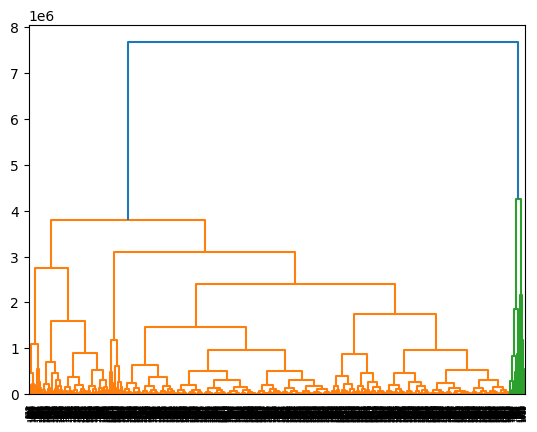

In [45]:
Zpca = hierarchy.linkage(Mpca, 'complete')
dendrogram = hierarchy.dendrogram(Zpca)

<Axes: xlabel='Age', ylabel='Income'>

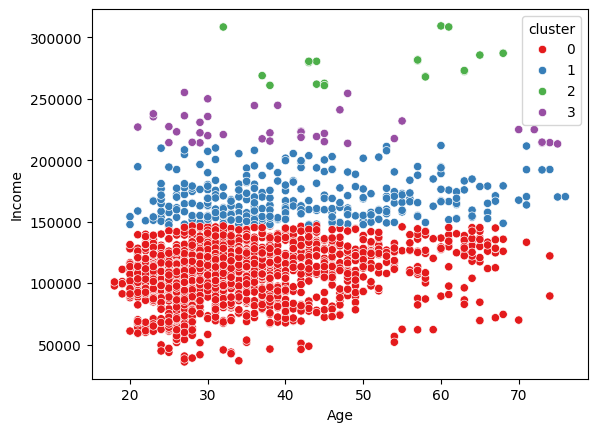

In [46]:
df['cluster'] = hierarchy.cut_tree(Z,n_clusters=4)
sns.scatterplot(data=df, x="Age", y="Income", hue="cluster", palette='Set1')

<Axes: xlabel='x', ylabel='y'>

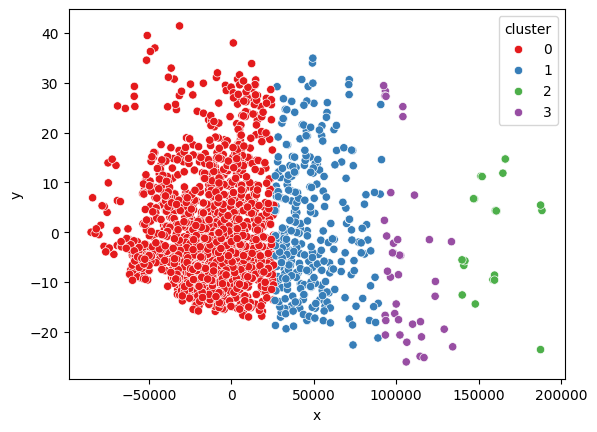

In [47]:
principal_df['cluster'] = hierarchy.cut_tree(Zpca,n_clusters=4)
sns.scatterplot(data=principal_df, x="x", y="y", hue="cluster", palette='Set1')

## Agrupamento com Average-Link

C:\Users\gabya\AppData\Local\Temp\ipykernel_61572\3072493606.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(M, 'average')


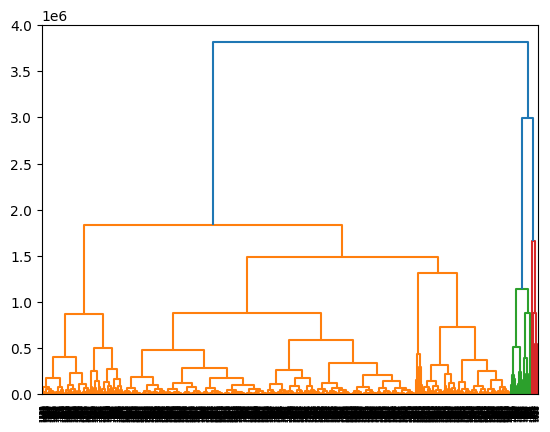

In [48]:
Z = hierarchy.linkage(M, 'average')
dendrogram = hierarchy.dendrogram(Z)

C:\Users\gabya\AppData\Local\Temp\ipykernel_61572\1107897932.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Zpca = hierarchy.linkage(Mpca, 'average')


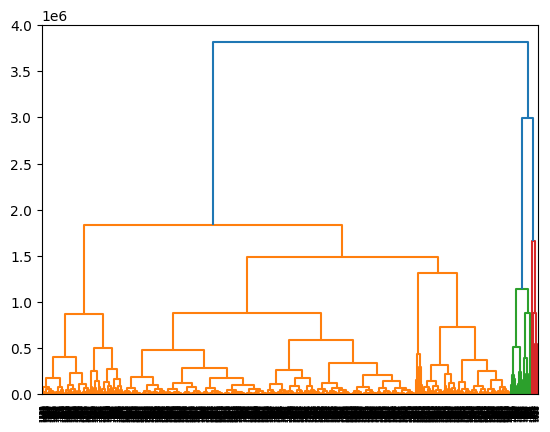

In [49]:
Zpca = hierarchy.linkage(Mpca, 'average')
dendrogram = hierarchy.dendrogram(Zpca)

<Axes: xlabel='Age', ylabel='Income'>

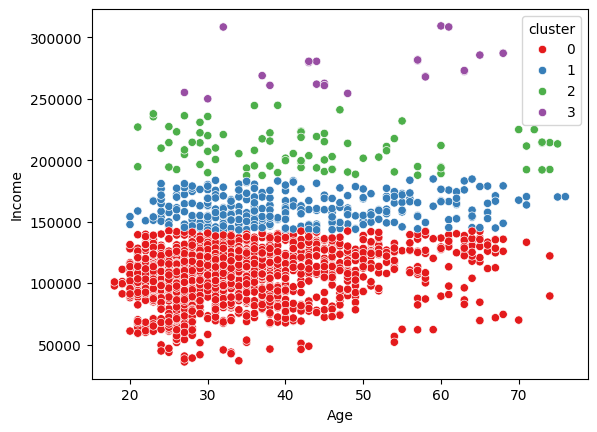

In [50]:
df['cluster'] = hierarchy.cut_tree(Z,n_clusters=4)
sns.scatterplot(data=df, x="Age", y="Income", hue="cluster", palette='Set1')

<Axes: xlabel='x', ylabel='y'>

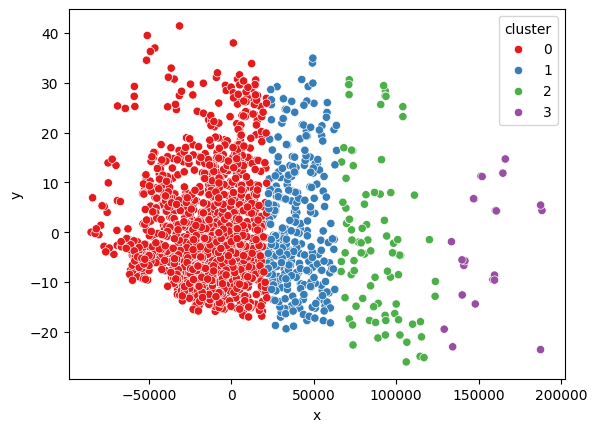

In [51]:
principal_df['cluster'] = hierarchy.cut_tree(Zpca,n_clusters=4)
sns.scatterplot(data=principal_df, x="x", y="y", hue="cluster", palette='Set1')

# K-Means

In [52]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,n_init=10,init='random',max_iter=300)
kmeans.fit(df)

KMeans(init='random', n_clusters=4, n_init=10)

In [53]:
df['cluster'] = kmeans.labels_
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,0,0,67,2,124670,1,2,2
1,1,1,22,1,150773,1,2,3
2,0,0,49,1,89210,0,0,0
3,0,0,45,1,171565,1,1,3
4,0,0,53,1,149031,1,1,3
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,2
1996,1,1,27,1,117744,1,0,2
1997,0,0,31,0,86400,0,0,0
1998,1,1,24,1,97968,0,0,2


In [54]:
df.to_csv('segmentation_data_clustering.csv')

<Axes: xlabel='Age', ylabel='Income'>

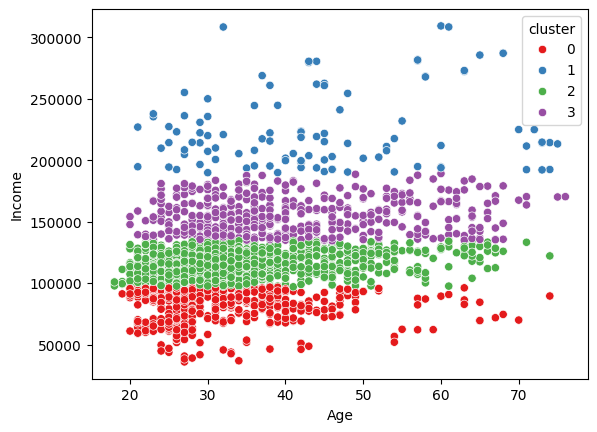

In [55]:
sns.scatterplot(data=df, x='Age', y='Income', hue="cluster", palette='Set1')

In [56]:
centroids = kmeans.cluster_centers_
centroids

array([[5.40372671e-01, 5.11387164e-01, 3.22318841e+01, 8.94409938e-01,
        7.90856128e+04, 1.53209110e-01, 1.63561077e-01, 5.55111512e-16],
       [2.85714286e-01, 4.00000000e-01, 4.45904762e+01, 1.34285714e+00,
        2.25124867e+05, 1.77142857e+00, 1.46666667e+00, 2.22857143e+00],
       [5.06820567e-01, 5.27806925e-01, 3.43819517e+01, 9.98950682e-01,
        1.14750034e+05, 8.26862539e-01, 7.10388248e-01, 1.55431223e-15],
       [3.05010893e-01, 4.37908497e-01, 4.09629630e+01, 1.20043573e+00,
        1.54064475e+05, 1.24836601e+00, 1.23747277e+00, 7.45098039e-01]])

In [57]:
# Erro quadrático
E = kmeans.inertia_
E

377129345552.6875

<Axes: xlabel='x', ylabel='y'>

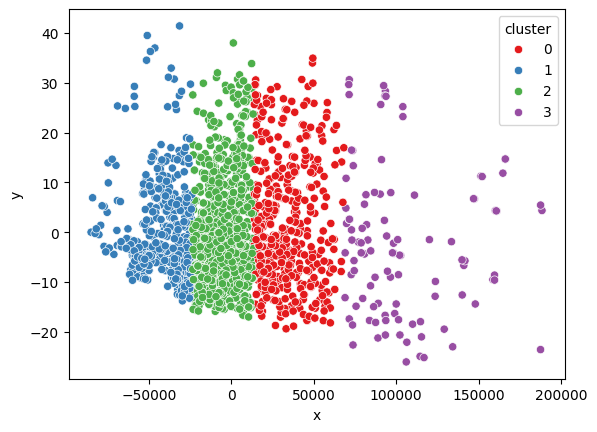

In [58]:
kmeans = KMeans(n_clusters=4,n_init=10,init='random',max_iter=300)
kmeans.fit(principal_df)

principal_df['cluster'] = kmeans.labels_

sns.scatterplot(data=principal_df, x='x', y='y', hue="cluster", palette='Set1')

In [59]:
centroids = kmeans.cluster_centers_
centroids

array([[ 3.32828121e+04,  1.54516993e+00,  7.51648352e-01],
       [-4.17583904e+04,  6.87281976e-01,  5.55111512e-16],
       [-6.06603652e+03, -8.41791242e-01,  1.55431223e-15],
       [ 1.04170448e+05, -2.22859535e+00,  2.22857143e+00]])

In [60]:
# Erro quadrático
E = kmeans.inertia_
E

377110107568.8626

In [61]:
principal_df.to_csv('segmentation_data_clustering_pca.csv')